In [1]:
import pandas as pd
import numpy as np
import re
import string

## methods and stopwords text processing

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

#Machine Learning Libraries

from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import warnings

warnings.filterwarnings("ignore")

English Stopwords

In [2]:
import nltk

nltk.download('stopwords')
stop_word=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/rohan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Loading The Dataset

In [3]:
df = pd.read_csv('annotationsfinal.csv', encoding='ISO-8859-1')


Data Cleaning

In [4]:
df.columns = ['random', 'Tweet', 'Sentiment']

In [5]:
df.head()

,random,Tweet,Sentiment
0,614484565059596288,Dorian Gray with Rainbow Scarf #LoveWins (from...,happy
1,614746522043973632,@SelectShowcase @Tate_StIves ... Replace with ...,happy
2,614877582664835073,@Sofabsports thank you for following me back. ...,happy
3,611932373039644672,@britishmuseum @TudorHistory What a beautiful ...,happy
4,611570404268883969,@NationalGallery @ThePoldarkian I have always ...,happy


In [6]:
df=df.drop(['random'], axis=1)

In [7]:
df=df[df.Sentiment!='nocode']

In [8]:
df.head()

,Tweet,Sentiment
0,Dorian Gray with Rainbow Scarf #LoveWins (from...,happy
1,@SelectShowcase @Tate_StIves ... Replace with ...,happy
2,@Sofabsports thank you for following me back. ...,happy
3,@britishmuseum @TudorHistory What a beautiful ...,happy
4,@NationalGallery @ThePoldarkian I have always ...,happy


In [9]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

In [10]:
encoder.fit_transform(df['Sentiment'])

array([3, 3, 3, ..., 3, 3, 6])

In [11]:
df['target']=encoder.fit_transform(df['Sentiment'])

In [12]:
le_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(le_name_mapping)

{'angry': 0, 'disgust': 1, 'disgust|angry': 2, 'happy': 3, 'happy|sad': 4, 'happy|surprise': 5, 'not-relevant': 6, 'sad': 7, 'sad|angry': 8, 'sad|disgust': 9, 'sad|disgust|angry': 10, 'surprise': 11}


In [13]:
df.head()

,Tweet,Sentiment,target
0,Dorian Gray with Rainbow Scarf #LoveWins (from...,happy,3
1,@SelectShowcase @Tate_StIves ... Replace with ...,happy,3
2,@Sofabsports thank you for following me back. ...,happy,3
3,@britishmuseum @TudorHistory What a beautiful ...,happy,3
4,@NationalGallery @ThePoldarkian I have always ...,happy,3


In [14]:

#missing values
df.isnull().sum()

Tweet        0
Sentiment    0
target       0
dtype: int64

In [15]:

#check for duplicate values
df.duplicated().sum()

27

In [16]:
#remove duplicates
df = df.drop_duplicates(keep = 'first')

In [17]:
df.duplicated().sum()

0

In [18]:

df.shape


(1486, 3)

EDA

In [19]:
df.head()

,Tweet,Sentiment,target
0,Dorian Gray with Rainbow Scarf #LoveWins (from...,happy,3
1,@SelectShowcase @Tate_StIves ... Replace with ...,happy,3
2,@Sofabsports thank you for following me back. ...,happy,3
3,@britishmuseum @TudorHistory What a beautiful ...,happy,3
4,@NationalGallery @ThePoldarkian I have always ...,happy,3


In [20]:
non_happy_df=df[df["Sentiment"] != "happy"]

In [21]:
happy_df=df[df["Sentiment"] == "happy"].iloc[:non_happy_df.shape[0]]

In [22]:
happy_df.shape

(350, 3)

In [23]:
df = pd.concat([happy_df, non_happy_df])

In [24]:
df.head()

,Tweet,Sentiment,target
0,Dorian Gray with Rainbow Scarf #LoveWins (from...,happy,3
1,@SelectShowcase @Tate_StIves ... Replace with ...,happy,3
2,@Sofabsports thank you for following me back. ...,happy,3
3,@britishmuseum @TudorHistory What a beautiful ...,happy,3
4,@NationalGallery @ThePoldarkian I have always ...,happy,3


In [25]:
df.shape

(700, 3)

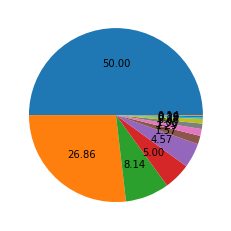

In [26]:

import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(), autopct="%0.2f")
plt.show()


Data Preprocessing

In [27]:
import nltk

nltk.download('punkt')


[nltk_data] Downloading package punkt to /home/rohan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

In [29]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]

    for i in text:
        if(i.isalnum()):
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))



    return " ".join(y)

In [30]:
ps.stem('playing')

'play'

In [31]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/rohan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
from nltk.corpus import stopwords

stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [33]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
transform_text("Hi, How are You 20% %% eg, I am doing well, what are you lecturing")

'hi 20 eg well lectur'

In [35]:
df['transformed_tweet'] = df['Tweet'].apply(transform_text)

In [36]:
df.head()

,Tweet,Sentiment,target,transformed_tweet
0,Dorian Gray with Rainbow Scarf #LoveWins (from...,happy,3,dorian gray rainbow scarf lovewin britishmuseu...
1,@SelectShowcase @Tate_StIves ... Replace with ...,happy,3,selectshowcas replac wish artist use next inst...
2,@Sofabsports thank you for following me back. ...,happy,3,sofabsport thank follow back great hear divers...
3,@britishmuseum @TudorHistory What a beautiful ...,happy,3,britishmuseum tudorhistori beauti jewel portra...
4,@NationalGallery @ThePoldarkian I have always ...,happy,3,nationalgalleri thepoldarkian alway love paint


Model Building

In [37]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv=CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [38]:
X=tfidf.fit_transform(df['transformed_tweet']).toarray()

In [39]:
X.shape

(700, 2441)

In [40]:
y=df['target'].values

In [41]:
y

array([ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=2)

In [44]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [45]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [46]:
gnb.fit(X_train, y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1, average='micro'))

0.5928571428571429
[[ 4  0  0  1  0  0  4  0  0  0  1  1]
 [ 0  0  0  1  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  1  0  0  0  0  0]
 [ 0  0  1 61  1  0  7  0  1  0  0  3]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  1  0  0  0  0]
 [ 2  0  0 10  1  0 18  0  3  1  0  0]
 [ 2  0  0  4  1  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  2  0  0  3  0  0  0  0  0]]
0.5928571428571429


In [47]:
mnb.fit(X_train, y_train)
y_pred1=mnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
#print(precision_score(y_test, y_pred1, average='micro'))

0.5642857142857143
[[ 1  0  0  9  0  1  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  0  3  0  0  0  0]
 [ 0  0  0 74  0  0  0  0]
 [ 0  0  0  2  0  0  0  0]
 [ 0  0  0 31  0  4  0  0]
 [ 0  0  0  8  0  0  0  0]
 [ 0  0  0  6  0  0  0  0]]


In [48]:
bnb.fit(X_train, y_train)
y_pred1=bnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1, average='micro'))

0.5428571428571428
[[ 0  0  0 10  0  1  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  0  3  0  0  0  0]
 [ 0  0  0 74  0  0  0  0]
 [ 0  0  0  2  0  0  0  0]
 [ 0  0  0 33  0  2  0  0]
 [ 0  0  0  8  0  0  0  0]
 [ 0  0  0  6  0  0  0  0]]
0.5428571428571428


In [49]:
from sklearn.linear_model import LogisticRegression

model2=LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

In [50]:
pred=model2.predict(X_test)

In [51]:
accuracy_score(y_test, pred)

0.5714285714285714

In [56]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(model2, open('model.pkl', 'wb'))

In [53]:
df.shape

(700, 4)

In [54]:
df.head()

,Tweet,Sentiment,target,transformed_tweet
0,Dorian Gray with Rainbow Scarf #LoveWins (from...,happy,3,dorian gray rainbow scarf lovewin britishmuseu...
1,@SelectShowcase @Tate_StIves ... Replace with ...,happy,3,selectshowcas replac wish artist use next inst...
2,@Sofabsports thank you for following me back. ...,happy,3,sofabsport thank follow back great hear divers...
3,@britishmuseum @TudorHistory What a beautiful ...,happy,3,britishmuseum tudorhistori beauti jewel portra...
4,@NationalGallery @ThePoldarkian I have always ...,happy,3,nationalgalleri thepoldarkian alway love paint


In [55]:
df[df["Sentiment"] == "happy"].shape

(350, 4)